In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [37]:
taxi = pd.read_csv("taxi_trip_pricing.csv")
taxi.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [38]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [39]:
taxi.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [ ]:
taxi['Time_of_Day'].fillna(taxi['Time_of_Day'].mode()[0], inplace=True )
taxi['Day_of_Week'].fillna(taxi['Day_of_Week'].mode()[0], inplace=True )
taxi['Trip_Duration_Minutes'].fillna(taxi['Trip_Duration_Minutes'].mean(),inplace=True)
taxi['Per_Km_Rate'].fillna(taxi['Per_Km_Rate'].mean(),inplace=True)
taxi['Trip_Distance_km'].fillna(taxi['Trip_Distance_km'].mean(),inplace=True)
taxi['Passenger_Count'].fillna(taxi['Passenger_Count'].mean(),inplace=True)
taxi['Base_Fare'].fillna(taxi['Base_Fare'].mean(),inplace=True)
taxi['Traffic_Conditions'].fillna(taxi['Traffic_Conditions'].mode()[0] , inplace=True )
taxi['Per_Minute_Rate'].fillna(taxi['Per_Minute_Rate'].mean(),inplace=True)
taxi['Trip_Price'].fillna(taxi['Trip_Price'].mean(),inplace=True)
taxi['Weather'].fillna(taxi['Weather'].mode()[0] , inplace=True )

In [41]:
taxi.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

## Statistical Summary

In [43]:
taxi.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.400775,1.074311,0.848107,0.418922,0.112662,31.339413,39.464810
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.107500,2.000000,2.770000,0.870000,0.197500,37.107500,34.578850
50%,26.995000,2.476842,3.502989,1.233316,0.292916,62.118116,52.617000
75%,37.782500,3.000000,4.202500,1.580000,0.382500,87.775000,67.476650
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


## Data Visualizations

<Figure size 1200x600 with 0 Axes>

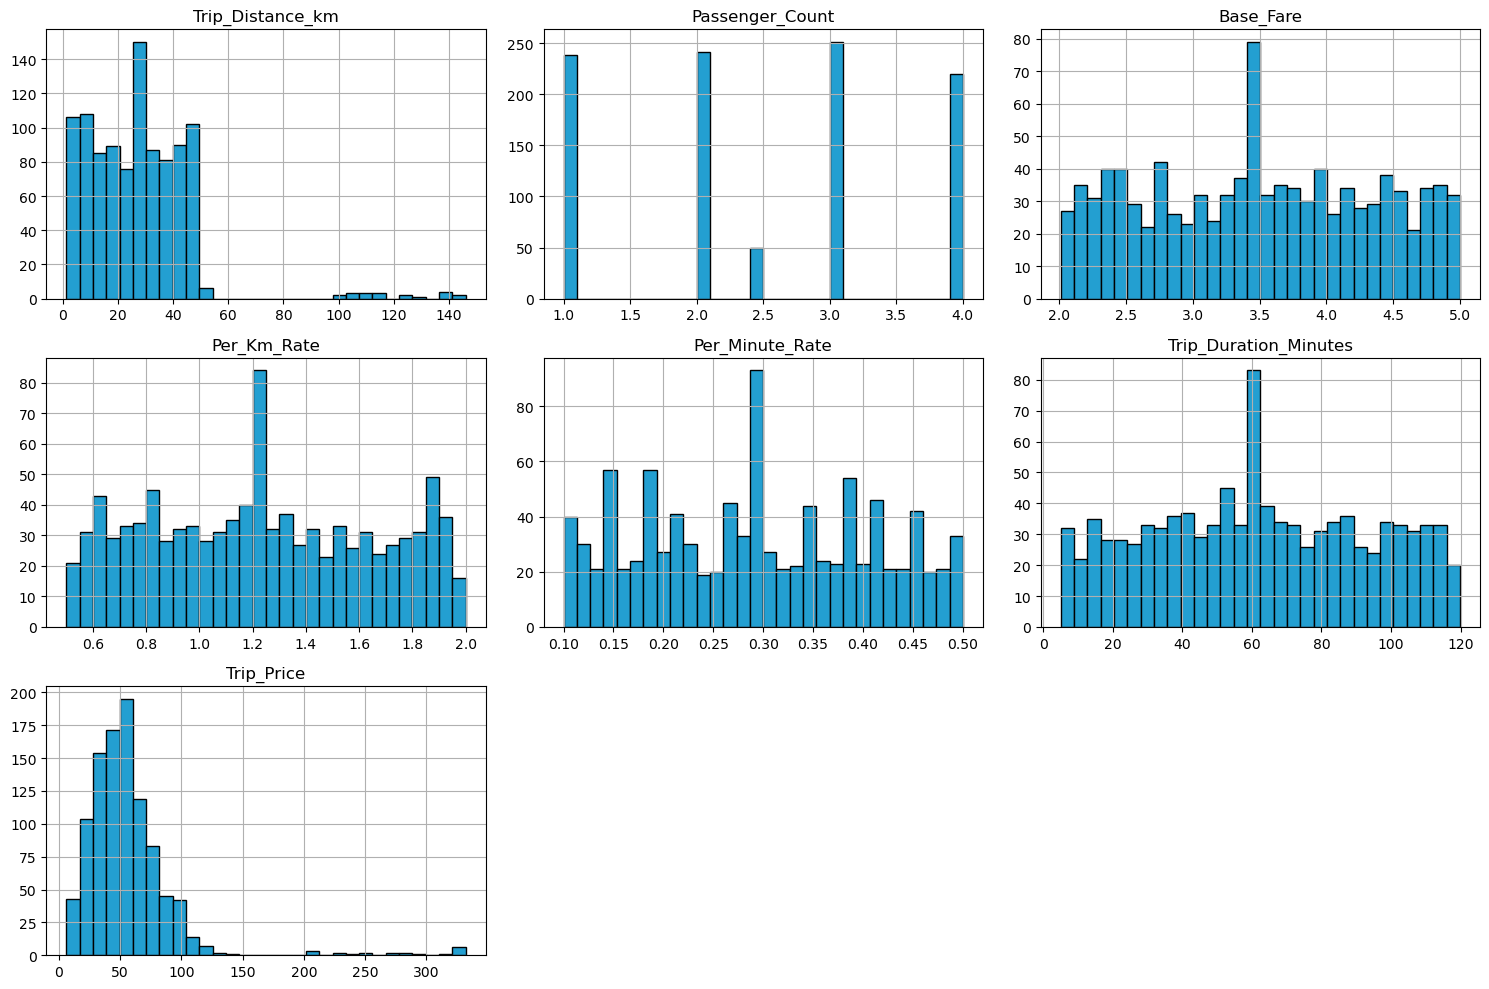

In [45]:
plt.figure(figsize=(12, 6))
taxi.hist(bins=30, figsize=(15, 10), color='#239fd1', edgecolor='black')
plt.tight_layout()
plt.show()

### Correlation Heatmap

In [47]:
corr_mat = taxi.corr(numeric_only=True)
corr_mat

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,-0.045871,0.031029,-0.016200,-0.024645,-0.021239,0.829685
Passenger_Count,-0.045871,1.000000,0.021578,0.028767,0.032560,0.021615,-0.013572
Base_Fare,0.031029,0.021578,1.000000,0.002919,-0.018119,0.011501,0.034217
Per_Km_Rate,-0.016200,0.028767,0.002919,1.000000,0.027863,0.025732,0.257674
Per_Minute_Rate,-0.024645,0.032560,-0.018119,0.027863,1.000000,-0.022822,0.130446
Trip_Duration_Minutes,-0.021239,0.021615,0.011501,0.025732,-0.022822,1.000000,0.215144
Trip_Price,0.829685,-0.013572,0.034217,0.257674,0.130446,0.215144,1.000000


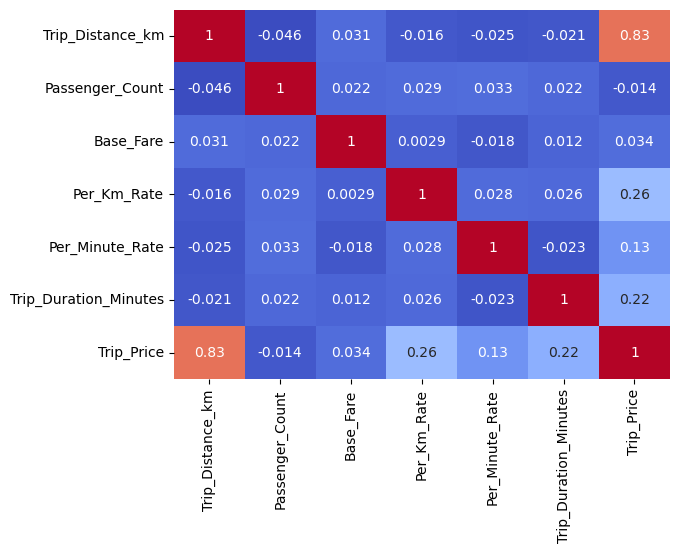

In [48]:
fig, ax = plt.subplots()
ax = sns.heatmap(corr_mat, cbar=False, cmap='coolwarm', annot=True)

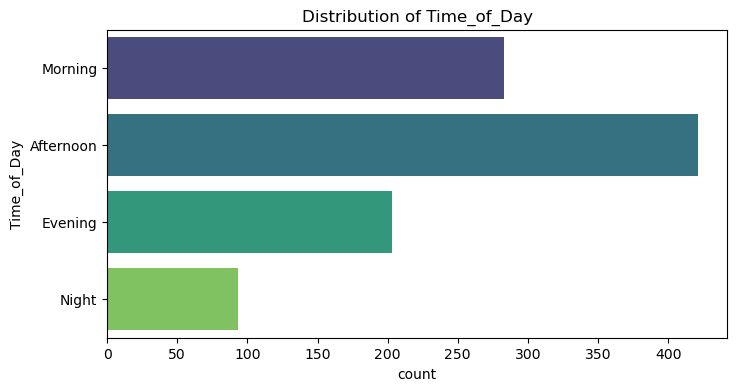

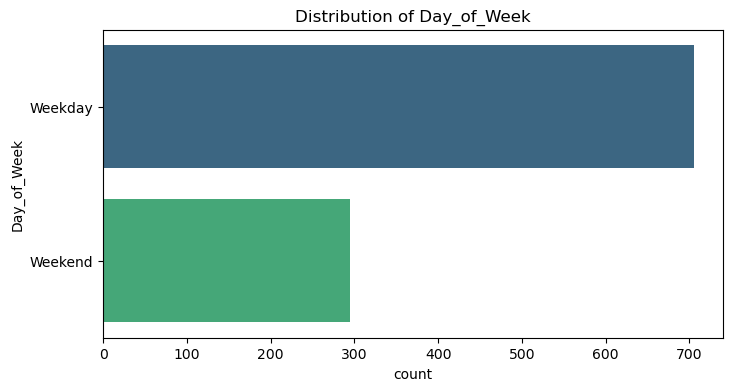

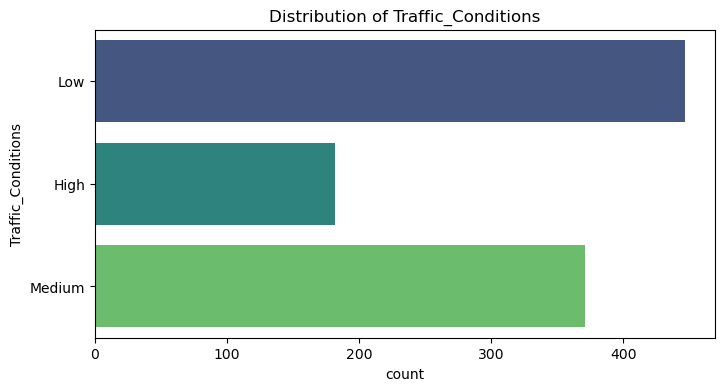

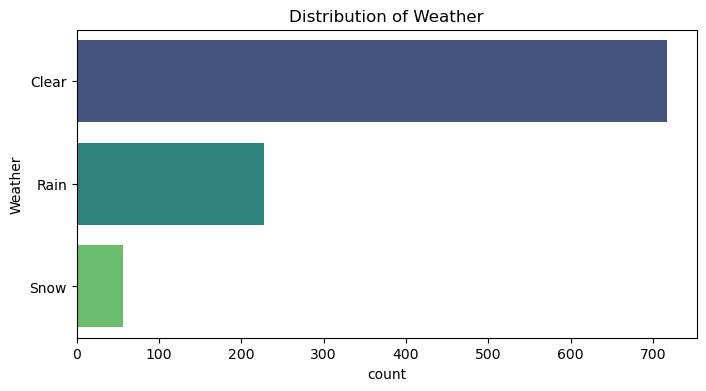

In [ ]:
categoricals = taxi.select_dtypes(include=['object']).columns

for col in categoricals:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=taxi, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.show()

# Linear Regression Model

In [ ]:
target_column = 'Trip_Price'
y = taxi[target_column]
X = taxi.drop(columns=[target_column])

In [ ]:
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
 model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [73]:
model.fit(X_train,  y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object'))])),
                ('regressor', LinearRegression())])

## Model Evaluation

In [76]:
y_pred = model.predict(X_test)

In [78]:
y_pred

array([ 7.41245756e+01,  8.87129712e+01,  6.34853391e+01,  7.29436605e+01,
        1.21368580e+02,  7.62709303e+01,  2.55626866e+01,  5.54675898e+01,
        2.95329048e+01,  7.74124838e+01,  7.45383661e+01,  1.02080170e+02,
        7.45038295e+01,  2.54061552e+01,  3.19056073e-01,  1.25791464e+00,
        7.08771902e+01,  1.56224853e+01,  1.94685843e+01,  3.74038469e+01,
        7.91629764e+01,  3.88686847e+01, -2.33916486e+01,  3.53202408e+01,
        4.50235867e+01,  9.20913666e+01,  6.68456743e+01,  4.32804654e+01,
        3.46544804e+01,  9.44004885e+01,  8.40367798e+01,  8.71371451e+01,
        1.33616474e+01,  1.05682397e+02,  3.83734941e+01,  9.56485999e+01,
        2.23236838e+01,  5.82639875e+01,  2.61329959e+01,  7.66031816e+01,
        5.24040588e+01,  3.79764406e+01,  9.09442532e-02,  3.22928433e+01,
        1.17852171e+01,  5.93311117e+01,  5.33195073e+01,  4.41304069e+01,
        4.31973949e+01,  4.97896243e+01,  6.35841572e+01,  7.31367962e+00,
        8.40225434e+01,  

In [80]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 194.72155605084498
R-squared (R2): 0.7654985684729739


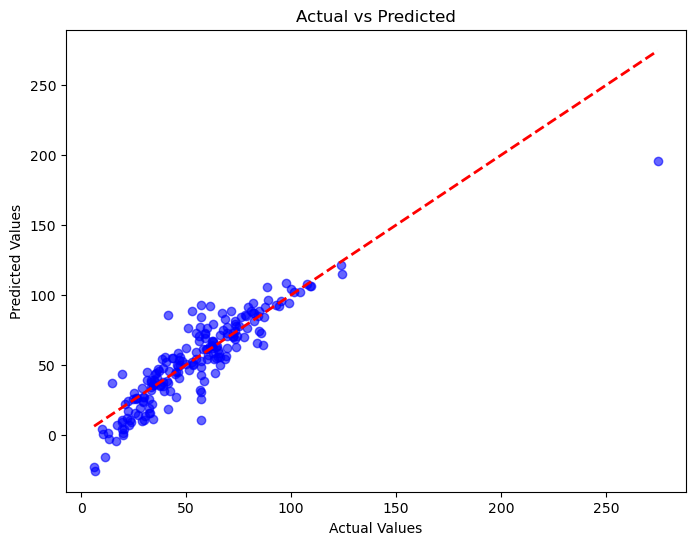

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()